<a href="https://colab.research.google.com/github/NguyenGiaDatt20104004/Nguyen-Gia-Dat-20104004/blob/main/AI_(200922).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=562fc35ce03640904c2f2d88f0573fe089752e2170da3fc72b4e763640e7894f
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
x = np.arange(11)
"""Tạo tam giác với ba đỉnh (0,0),(5,1),(10,0)"""
mfx = fuzz.trimf(x, [0,5,10])
#x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

In [ ]:
import numpy as np
import skfuzzy as fuzz
x = np.arange(6)
"""Tạo tam giác vuông với ba đỉnh (0,0),(0,1),(5,0)"""
mfx = fuzz.trimf(x, [0,0,5])
#x
mfx

array([1. , 0.8, 0.6, 0.4, 0.2, 0. ])

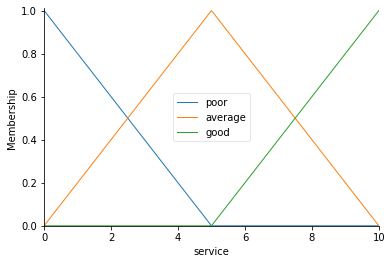

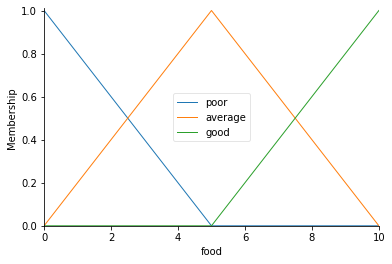

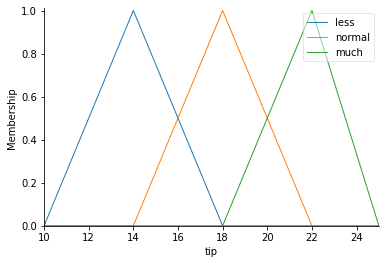

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

"""Antecedent: đầu vào"""
"""Consequent: output (kết quả)"""
food = ctrl.Antecedent(np.arange(0,11,1), "food")
service = ctrl.Antecedent(np.arange(0,11,1), "service")
tip = ctrl.Consequent(np.arange(10,26,1), "tip")

food["poor"] = fuzz.trimf(food.universe, [0,0,5])
food["average"] = fuzz.trimf(food.universe, [0,5,10])
food["good"] = fuzz.trimf(food.universe, [5,10,10])

service["poor"] = fuzz.trimf(service.universe, [0,0,5])
service["average"] = fuzz.trimf(service.universe, [0,5,10])
service["good"] = fuzz.trimf(service.universe, [5,10,10])

tip["less"] = fuzz.trimf(tip.universe, [10,14,18])
tip["normal"] = fuzz.trimf(tip.universe, [14,18,22])
tip["much"] = fuzz.trimf(tip.universe, [18,22,25])

service.view()
food.view()
tip.view()

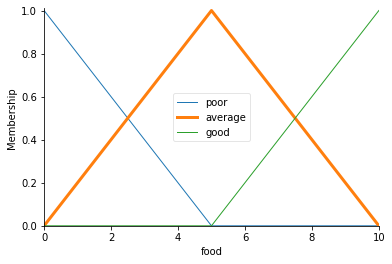

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

"""Antecedent: đầu vào"""
"""Consequent: output (kết quả)"""
food = ctrl.Antecedent(np.arange(0,11,1), "food")
service = ctrl.Antecedent(np.arange(0,11,1), "service")
tip = ctrl.Consequent(np.arange(10,26,1), "tip")

food["poor"] = fuzz.trimf(food.universe, [0,0,5])
food["average"] = fuzz.trimf(food.universe, [0,5,10])
food["good"] = fuzz.trimf(food.universe, [5,10,10])

service["poor"] = fuzz.trimf(service.universe, [0,0,5])
service["average"] = fuzz.trimf(service.universe, [0,5,10])
service["good"] = fuzz.trimf(service.universe, [5,10,10])

tip["less"] = fuzz.trimf(tip.universe, [10,14,18])
tip["normal"] = fuzz.trimf(tip.universe, [14,18,22])
tip["much"] = fuzz.trimf(tip.universe, [18,22,25])

food["average"].view()

21.666666666666668


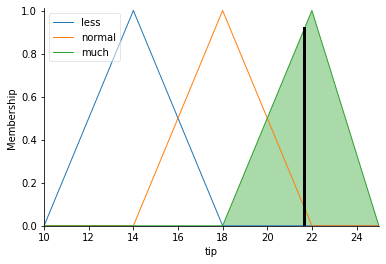

In [ ]:
rule1 = ctrl.Rule(food["poor"] & service["poor"], tip["less"])
rule2 = ctrl.Rule(food["average"] & service["poor"], tip["less"])
rule3 = ctrl.Rule(food["poor"] & service["average"], tip["less"])
rule4 = ctrl.Rule(food["average"] & service["average"], tip["normal"])
rule5 = ctrl.Rule(food["good"] & service["poor"], tip["normal"])
rule6 = ctrl.Rule(food["poor"] & service["good"], tip["normal"])
rule7 = ctrl.Rule(food["good"] & service["good"], tip["much"])
rule8 = ctrl.Rule(food["average"] & service["good"], tip["much"])
rule9 = ctrl.Rule(food["good"] & service["average"], tip["much"])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input["food"] = 10
tipping.input["service"] = 10
tipping.compute()
print(tipping.output["tip"])
tip.view(sim = tipping)

50.67417685080018


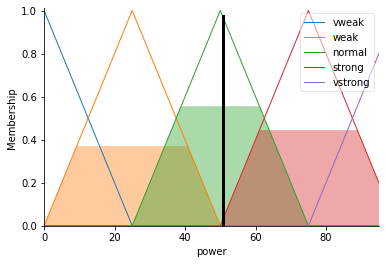

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

"""Đầu vào"""
time = ctrl.Antecedent(np.arange(10,121,5), "time")
rise = ctrl.Antecedent(np.arange(100,1001,5), "rise")
"""Đầu ra"""
power = ctrl.Consequent(np.arange(0,100,5), "power")

time["vfast"] = fuzz.trimf(time.universe, [10,10,37])
time["fast"] = fuzz.trimf(time.universe, [10,37,65])
time["normal"] = fuzz.trimf(time.universe, [37,65,93])
time["low"] = fuzz.trimf(time.universe, [54,93,120])
time["vlow"] = fuzz.trimf(time.universe, [93,120,120])

rise["vfew"] = fuzz.trimf(rise.universe, [100,100,325])
rise["few"] = fuzz.trimf(rise.universe, [100,325,550])
rise["normal"] = fuzz.trimf(rise.universe, [325,550,775])
rise["much"] = fuzz.trimf(rise.universe, [550,775,1000])
rise["vmuch"] = fuzz.trimf(rise.universe, [775,1000,1000])

power["vweak"] = fuzz.trimf(power.universe, [0,0,25])
power["weak"] = fuzz.trimf(power.universe, [0,25,50])
power["normal"] = fuzz.trimf(power.universe, [25,50,75])
power["strong"] = fuzz.trimf(power.universe, [50,75,100])
power["vstrong"] = fuzz.trimf(power.universe, [75,100,100])

rule1 = ctrl.Rule(time["vlow"] & rise["vfew"], power["vweak"])
rule2 = ctrl.Rule(time["low"] & rise["vfew"], power["vweak"])
rule3 = ctrl.Rule(time["vlow"] & rise["few"], power["vweak"])
rule4 = ctrl.Rule(time["low"] & rise["few"], power["vweak"])

rule5 = ctrl.Rule(time["normal"] & rise["vfew"], power["weak"])
rule6 = ctrl.Rule(time["fast"] & rise["vfew"], power["weak"])
rule7 = ctrl.Rule(time["normal"] & rise["few"], power["weak"])
rule8 = ctrl.Rule(time["vlow"] & rise["normal"], power["weak"])
rule9 = ctrl.Rule(time["low"] & rise["normal"], power["weak"])
rule10 = ctrl.Rule(time["vlow"] & rise["much"], power["weak"])

rule11 = ctrl.Rule(time["vfast"] & rise["vfew"], power["normal"])
rule12 = ctrl.Rule(time["fast"] & rise["few"], power["normal"])
rule13 = ctrl.Rule(time["normal"] & rise["normal"], power["normal"])
rule14 = ctrl.Rule(time["low"] & rise["much"], power["normal"])
rule15 = ctrl.Rule(time["vlow"] & rise["vmuch"], power["normal"])

rule16 = ctrl.Rule(time["vfast"] & rise["few"], power["strong"])
rule17 = ctrl.Rule(time["fast"] & rise["normal"], power["strong"])
rule18 = ctrl.Rule(time["vfast"] & rise["normal"], power["strong"])
rule19 = ctrl.Rule(time["normal"] & rise["much"], power["strong"])
rule20 = ctrl.Rule(time["low"] & rise["vmuch"], power["strong"])
rule21 = ctrl.Rule(time["normal"] & rise["vmuch"], power["strong"])

rule22 = ctrl.Rule(time["fast"] & rise["much"], power["vstrong"])
rule23 = ctrl.Rule(time["vfast"] & rise["much"], power["vstrong"])
rule24 = ctrl.Rule(time["fast"] & rise["vmuch"], power["vstrong"])
rule25 = ctrl.Rule(time["vfast"] & rise["vmuch"], power["vstrong"])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7,
                                   rule8, rule9, rule10, rule11, rule12, rule13, rule14, 
                                   rule15, rule16, rule17, rule18, rule19, rule20, rule21, 
                                   rule22, rule23, rule24, rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input["time"] = 20
tipping.input["rise"] = 200
tipping.compute()
print(tipping.output["power"])
power.view(sim = tipping)